stackingのアンサンブル用シート

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D",'K',"S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'K','S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D','K', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


lightGBMとDARTとGOSSとXGBoostでstackingアンサンブルを行う。

In [2]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
sX_train, sX_valid, sy_train, sy_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [3]:
####LisgtGBM###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_LGBM = {
    'objective':'regression',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 4.430375245218262e-06,
    'max_bin': 502,
    'num_leaves': 97
}
model_LGBM = lgb.train(
                    params_LGBM,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=3000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###DART###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_DART = {
    'objective':'regression',
    'boosting_type':'dart',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 2.1600820741402023e-05,
    'max_bin': 556,
    'num_leaves': 126
}

model_DART = lgb.train(
                    params_DART,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=1000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###GOSS###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_GOSS = {
    'objective':'regression',
    'boosting_type':'goss',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 4.669226029558975e-07,
    'max_bin': 584,
    'num_leaves': 85
}

model_GOSS = lgb.train(
                    params_GOSS,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=1000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###XGBoost###
xgb_reg = xgboost.XGBRegressor(
    #目的関数の指定 初期値も二乗誤差です
                    objective='reg:linear',
                    #学習のラウンド数 early_stoppingを利用するので多めに指定
                    n_estimators=50000,
                    #boosterに何を用いるか 初期値もgbtreeです
                    booster='gbtree',
                    learning_rate=0.05,
                    max_depth=7,
                    random_state=0,
                    reg_alfa=2.054762512591133e-06,
                    sub_sample=0.5530198332197337,
                    colsample_bytree=0.7642417009494488,
                    min_child_weight=0.14135935551752302
)
xgb_reg.fit(sX_train, sy_train, eval_set=[(sX_valid, sy_valid)], early_stopping_rounds=10)

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'K', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' ar

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 14
[LightGBM] [Info] Start training from score 118575.175126
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 50511.5	valid_1's rmse: 47173.3
[20]	training's rmse: 36554.8	valid_1's rmse: 34357.2
[30]	training's rmse: 27718.5	valid_1's rmse: 27678.9
[40]	training's rmse: 21895.7	valid_1's rmse: 23455.8
[50]	training's rmse: 18480.9	valid_1's rmse: 21216
[60]	training's rmse: 16201.8	valid_1's rmse: 19959.1
[70]	training's rmse: 14759.3	valid_1's rmse: 19144.7
[80]	training's rmse: 13748	valid_1's rmse: 18632.3
[90]	training's rmse: 13001.9	valid_1's rmse: 18250.1
[100]	training's rmse: 12406.5	valid_1's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[20]	training's rmse: 39060.6	valid_1's rmse: 38386.1
[30]	training's rmse: 31370.9	valid_1's rmse: 32300.4
[40]	training's rmse: 28097.6	valid_1's rmse: 30064.5
[50]	training's rmse: 31488.4	valid_1's rmse: 33271.2
[60]	training's rmse: 35739.4	valid_1's rmse: 37504.2
[70]	training's rmse: 37646.7	valid_1's rmse: 39294.6
[80]	training's rmse: 32693.3	valid_1's rmse: 34700.5
[90]	training's rmse: 32554.9	valid_1's rmse: 34409.7
[100]	training's rmse: 34533.3	valid_1's rmse: 36461.8
[110]	training's rmse: 41327.6	valid_1's rmse: 42712
[120]	training's rmse: 33168.8	valid_1's rmse: 35604.5
[130]	training's rmse: 30080.5	valid_1's rmse: 32858.9
[140]	training's rmse: 32758.2	valid_1's rmse: 35347.7
[150]	training's rmse: 31275.1	valid_1's rmse: 33906.6
[160]	training's rmse: 35974.8	valid_1's rmse: 38104.3
[170]	training's rmse: 29090.7	valid_1's rmse: 32068.1
[180]	training's rmse: 27767.1	valid_1's rmse: 31113.5
[190]	training's rmse: 23772.2	valid_1's rmse: 27726.5
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:68785.59039
[16]	validation_0-rmse:66023.10751
[17]	validation_0-rmse:63305.05193
[18]	validation_0-rmse:60876.61611
[19]	validation_0-rmse:58440.02378
[20]	validation_0-rmse:56526.74184
[21]	validation_0-rmse:54541.82777
[22]	validation_0-rmse:52925.30037
[23]	validation_0-rmse:51141.56174
[24]	validation_0-rmse:49636.51780
[25]	validation_0-rmse:48034.42951
[26]	validation_0-rmse:46578.44929
[27]	validation_0-rmse:45363.79701
[28]	validation_0-rmse:44017.63525
[29]	validation_0-rmse:42952.96790
[30]	validation_0-rmse:41787.19960
[31]	validation_0-rmse:40922.97690
[32]	validation_0-rmse:40116.82153
[33]	validation_0-rmse:39010.35724
[34]	validation_0-rmse:38065.92642
[35]	validation_0-rmse:37371.72353
[36]	validation_0-rmse:36730.88944
[37]	validation_0-rmse:36004.77936
[38]	validation_0-rmse:35466.79956
[39]	validation_0-rmse:34968.01568
[40]	validation_0-rmse:34527.49734
[41]	validation_0-rmse:34083.33354
[42]	validation_0-rmse:33663.22061
[43]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7642417009494488, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
             min_child_weight=0.14135935551752302, missing=nan,
             monotone_constraints='()', n_estimators=50000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alfa=2.054762512591133e-06, ...)

ブレンドのモデルが重回帰分析の場合

In [31]:
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
# stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = LinearRegression()
# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
# stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
stack_test_pred = np.column_stack((pred_LGBM, pred_GOSS, pred_XGB))
print(stack_test_pred)

blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

[[138580.03774219 131631.84568007 118002.78125   ]
 [121670.7329273  121447.10733973 119678.2734375 ]
 [ 81581.16831512  83961.93487889  84770.125     ]
 ...
 [177533.51012032 174722.01942288 172593.78125   ]
 [264934.83305639 258337.94436019 277411.        ]
 [ 84175.95815483  82119.23128678  82911.5       ]]


NameError: name 'blend_pred' is not defined

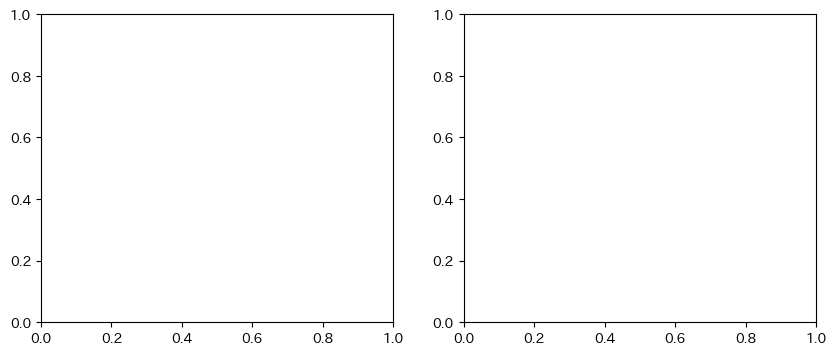

In [3]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')

ax2.plot(range(len(blend_pred)), blend_pred)

plt.legend(loc='best')
plt.show()

ブレンドのモデルがLGBMの場合

In [3]:
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
# valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
# stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB))
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = lgb.LGBMRegressor()
# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
# pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
# pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
# stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
stack_test_pred = np.column_stack((pred_LGBM, pred_GOSS, pred_XGB))
print(stack_test_pred)

blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

NameError: name 'model_LGBM' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


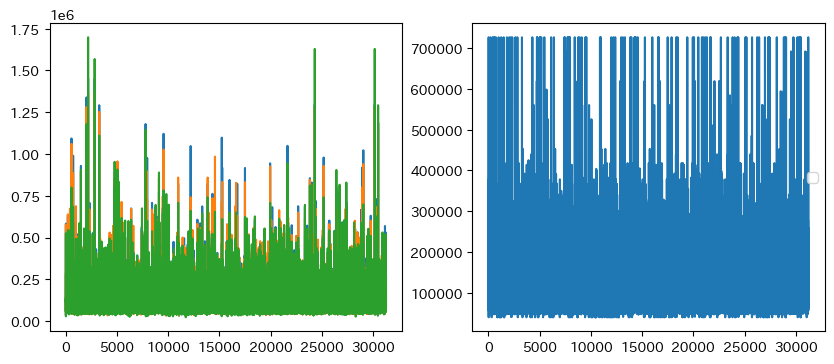

In [27]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')

ax2.plot(range(len(blend_pred)), blend_pred)

plt.legend(loc='best')
plt.show()

ファイル出力

In [36]:
df = pd.read_csv('test.csv')
id = df['id']
y_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('blend_result.csv',index=False)

### GBDTとDARTとGOSSとXGBoostでstackingアンサンブルを行う。(交差検証ver)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D",'K',"S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'K','S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D','K', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']

In [82]:
from statistics import LinearRegression


n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)
valid_GBDT = np.zeros(X_train.shape[0])
test_GBDT = np.zeros((X_test.shape[0], n_split))
valid_DART = np.zeros(X_train.shape[0])
test_DART = np.zeros((X_test.shape[0], n_split))
valid_GOSS = np.zeros(X_train.shape[0])
test_GOSS = np.zeros((X_test.shape[0], n_split))
valid_XGB = np.zeros(X_train.shape[0])
test_XGB = np.zeros((X_test.shape[0], n_split))
valid_CatBoost = np.zeros(X_train.shape[0])
test_CatBoost = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    ####GBDT###
    print('Start GBDT training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GBDT = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  2.7630799986965487e-05,
        'max_bin': 392,
        'num_leaves': 119,
    }
    model_GBDT = lgb.train(
                        params_GBDT,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GBDT[valid_index] = model_GBDT.predict(X_val)
    test_GBDT[:,fold_id] = model_GBDT.predict(X_test)

    ###DART###
    print('Start DART training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_DART = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.7630799986965487e-05,
        'max_bin': 392,
        'num_leaves': 119
    }
    model_DART = lgb.train(
                        params_DART,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=2000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_DART[valid_index] = model_DART.predict(X_val)
    test_DART[:,fold_id] = model_DART.predict(X_test)

    ###GOSS###
    print('Start GOSS training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GOSS = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }
    model_GOSS = lgb.train(
                        params_GOSS,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GOSS[valid_index] = model_GOSS.predict(X_val)
    test_GOSS[:,fold_id] = model_GOSS.predict(X_test)

    ###XGBoost###
    print('Start XGBoost training...')
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        objective='reg:linear',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='gbtree',
                        #学習率
                        learning_rate=0.05,
                        #木の最大深さ
                        max_depth=8,
                        #シード値
                        random_state=0,
                            #正則化
                        reg_alfa=3.860866271460544e-06,

                        sub_sample=0.12885368066372738,

                        colsample_bytree=0.6439324290786468,

                        min_child_weight=0.0163345876110695
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=10)
    valid_XGB[valid_index] = xgb_reg.predict(X_val)
    test_XGB[:,fold_id] = xgb_reg.predict(X_test)

    ###CatBoost###
    print('Start CatBoost training...')
    Cat_model = CatBoostRegressor(
                        loss_function='RMSE', 
                        iterations = 2000, 
                        early_stopping_rounds=10,
                        learning_rate=0.05, 
                        depth=7, 
                        l2_leaf_reg= 1.7538232373118053e-06, 
                        random_strength=26, 
                        bagging_temperature = 12.500712230836259,
                        od_type='Iter',
                        # od_wait = 10
    )
    train_pool = Pool(X_tr, label=y_tr, cat_features=category_lists)
    valid_pool = Pool(X_val, label=y_val, cat_features=category_lists)

    Cat_model.fit(train_pool, eval_set=valid_pool, use_best_model=True, early_stopping_rounds=10)
    valid_CatBoost[valid_index] = Cat_model.predict(X_val)
    test_CatBoost[:,fold_id] = Cat_model.predict(X_test)

valid_pred_GBDT = pd.DataFrame(valid_GBDT)
valid_pred_DART = pd.DataFrame(valid_DART)
valid_pred_GOSS = pd.DataFrame(valid_GOSS)
valid_pred_XGB = pd.DataFrame(valid_XGB)
valid_pred_CatBoost = pd.DataFrame(valid_CatBoost)
#ブレンドモデルの学習データとなる、各個別のモデルの検証データの予測値をまとめる
blend_X_train = pd.concat([valid_pred_GBDT,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB, valid_pred_CatBoost],axis=1)
blend_X_train.columns = ['GBDTの予測', 'DARTの予測', 'GOSSの予測', 'XGBの予測', 'CatBoostの予測']
blend_X_train.to_csv('../data/handmade_data/train_blend.csv',index=False)

# blend_model = lgb.LGBMRegressor()

pred_GBDT = test_GBDT.mean(axis=1)
pred_DART = test_DART.mean(axis=1)
pred_GOSS = test_GOSS.mean(axis=1)
pred_XGB = test_XGB.mean(axis=1)
pred_CatBoost = test_CatBoost.mean(axis=1)

pred_GBDT = pd.DataFrame(pred_GBDT)
pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)
pred_CatBoost = pd.DataFrame(pred_CatBoost)
#　ブレンドモデルのテストデータを作成
test_blend = pd.concat([pred_GBDT, pred_DART, pred_GOSS, pred_XGB, pred_CatBoost], axis=1)
test_blend.to_csv('../data/test_data/test_blend.csv',index=False)
print("ブレンドモデルに入れるテストデータ",test_blend)

# ブレンドモデルが訓練した時のvalidのRMSE
# blend_model = lgb.LGBMRegressor(
#             objective='rmse', 
#             seed=0, 
#             num_threads=1, 
#             learning_rate=0.05,
#             reg_lambda= 2.7630799986965487e-05,
#             max_bin=392,
#             num_leaves=119,
#         )

blend_valid_rmses_list = []
blend_model = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, max_depth=6, n_jobs=-1, random_state=0)
for fold_id, (train_index, valid_index) in enumerate(cv.split(blend_X_train)):
    X_tr = blend_X_train.loc[train_index,:]
    X_val = blend_X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start blend training...')
    # blend_model.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], verbose=10)
    # xgbc2_params = {
    # # 'n_eetimators': 100, 
    # # 'max_depth': 5, 
    # # 'random_state': 42, 
    # 'objective':'reg:linear',
    # #学習のラウンド数 early_stoppingを利用するので多めに指定
    # 'n_estimators':50000,
    # #boosterに何を用いるか 初期値もgbtreeです
    # 'booster':'gbtree',
    # #学習率
    # 'learning_rate':0.05,
    # #木の最大深さ
    # 'max_depth':8,
    # #シード値
    # 'random_state':0,
    #     #正則化
    # 'reg_alfa':3.860866271460544e-06,

    # 'sub_sample':0.12885368066372738,

    # 'colsample_bytree':0.6439324290786468,

    # 'min_child_weight':0.0163345876110695
    # }
    # blend_model = xgboost.XGBRegressor(**xgbc2_params)
    # blend_model = LinearRegression()
    blend_model.fit(sX_tr, sy_tr)
    blend_pred_y_val = blend_model.predict(sX_val)
    rmse = mean_squared_error(sy_val, blend_pred_y_val, squared=False)
    blend_valid_rmses_list.append(rmse)

blend_valid_rmse = np.mean(blend_valid_rmses_list)
print("rmses of blend model",blend_valid_rmses_list)
print("the valid rmse of blend model",blend_valid_rmse)
#ブレンドモデルによる最終の予測値
blend_pred = blend_model.predict(test_blend)
blend_pred = pd.DataFrame(blend_pred)

Start GBDT training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2484
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 19
[LightGBM] [Info] Start training from score 118553.622032
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48900.7	valid_1's rmse: 45213.6
[20]	training's rmse: 34415	valid_1's rmse: 31301
[30]	training's rmse: 26169.6	valid_1's rmse: 23803
[40]	training's rmse: 20989.1	valid_1's rmse: 19894.5


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback

[50]	training's rmse: 17726.1	valid_1's rmse: 17939.9
[60]	training's rmse: 15749.7	valid_1's rmse: 16906.7
[70]	training's rmse: 14325.2	valid_1's rmse: 16397.8
[80]	training's rmse: 13273.4	valid_1's rmse: 16107.3
[90]	training's rmse: 12595.5	valid_1's rmse: 15892.1
[100]	training's rmse: 11999.9	valid_1's rmse: 15662
[110]	training's rmse: 11516.1	valid_1's rmse: 15539
[120]	training's rmse: 11110.9	valid_1's rmse: 15390.1
[130]	training's rmse: 10732.8	valid_1's rmse: 15244.9
[140]	training's rmse: 10439.4	valid_1's rmse: 15154.2
[150]	training's rmse: 10161.6	valid_1's rmse: 15074.3
[160]	training's rmse: 9916.65	valid_1's rmse: 15000.5
[170]	training's rmse: 9695.12	valid_1's rmse: 14931.6
[180]	training's rmse: 9445.65	valid_1's rmse: 14883.9
[190]	training's rmse: 9242	valid_1's rmse: 14849.1
[200]	training's rmse: 9053.67	valid_1's rmse: 14799.4
[210]	training's rmse: 8861.65	valid_1's rmse: 14772.9
[220]	training's rmse: 8676.46	valid_1's rmse: 14745.1
[230]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	training's rmse: 27026.1	valid_1's rmse: 24754.2
[50]	training's rmse: 30557.8	valid_1's rmse: 28428.4
[60]	training's rmse: 34956.1	valid_1's rmse: 33226
[70]	training's rmse: 36882	valid_1's rmse: 35449.5
[80]	training's rmse: 31779.9	valid_1's rmse: 30519.1
[90]	training's rmse: 31672	valid_1's rmse: 30250.4
[100]	training's rmse: 33736	valid_1's rmse: 32593
[110]	training's rmse: 40633.3	valid_1's rmse: 39325.2
[120]	training's rmse: 32452.5	valid_1's rmse: 31445.9
[130]	training's rmse: 29222.6	valid_1's rmse: 28358.2
[140]	training's rmse: 32003.3	valid_1's rmse: 31420.3
[150]	training's rmse: 30446.8	valid_1's rmse: 29871.9
[160]	training's rmse: 35207	valid_1's rmse: 34428.9
[170]	training's rmse: 28500.7	valid_1's rmse: 28366.3
[180]	training's rmse: 27345.6	valid_1's rmse: 27423.1
[190]	training's rmse: 23408.3	valid_1's rmse: 23879.5
[200]	training's rmse: 22381.1	valid_1's rmse: 23059.6
[210]	training's rmse: 24495.4	valid_1's rmse: 24986.7
[220]	training's rmse: 21987

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:63030.03693
[17]	validation_0-rmse:60404.24744
[18]	validation_0-rmse:57879.90069
[19]	validation_0-rmse:55290.40032
[20]	validation_0-rmse:52790.80791
[21]	validation_0-rmse:50562.08608
[22]	validation_0-rmse:48416.78682
[23]	validation_0-rmse:46367.90747
[24]	validation_0-rmse:44701.25182
[25]	validation_0-rmse:42921.34640
[26]	validation_0-rmse:41349.12799
[27]	validation_0-rmse:39757.00337
[28]	validation_0-rmse:38203.58386
[29]	validation_0-rmse:36857.67230
[30]	validation_0-rmse:35712.99536
[31]	validation_0-rmse:34574.32074
[32]	validation_0-rmse:33380.74465
[33]	validation_0-rmse:32251.94053
[34]	validation_0-rmse:31239.09736
[35]	validation_0-rmse:30430.64788
[36]	validation_0-rmse:29581.77903
[37]	validation_0-rmse:28893.15991
[38]	validation_0-rmse:28140.69952
[39]	validation_0-rmse:27457.31884
[40]	validation_0-rmse:26784.08274
[41]	validation_0-rmse:26072.31637
[42]	validation_0-rmse:25405.02377
[43]	validation_0-rmse:24792.32954
[44]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2477
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 19
[LightGBM] [Info] Start training from score 118551.310354
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49257.7	valid_1's rmse: 46524.6
[20]	training's rmse: 35124.5	valid_1's rmse: 32899
[30]	training's rmse: 27029.2	valid_1's rmse: 25562.7
[40]	training's rmse: 22287.4	valid_1's rmse: 21463.4
[50]	training's rmse: 19353.7	valid_1's rmse: 19529.6
[60]	training's rmse: 17542.3	valid_1's rmse: 18647.7
[70]	training's rmse: 16262.4	valid_1's rmse: 18144.3
[80]	training's rmse: 15325.6	valid_1's rmse: 17781.3
[90]	training's rmse: 14625.6	valid_1's rmse: 17645.9
[100]	training's rmse: 14057.5	valid_1's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	training's rmse: 27989.7	valid_1's rmse: 26603.4
[50]	training's rmse: 31416.2	valid_1's rmse: 30150.9
[60]	training's rmse: 35620.7	valid_1's rmse: 34630.8
[70]	training's rmse: 37481.8	valid_1's rmse: 36565.9
[80]	training's rmse: 32595.9	valid_1's rmse: 31610.9
[90]	training's rmse: 32460.7	valid_1's rmse: 31429.5
[100]	training's rmse: 34475.1	valid_1's rmse: 33583.2
[110]	training's rmse: 41193.5	valid_1's rmse: 40167.8
[120]	training's rmse: 33245.8	valid_1's rmse: 32484.1
[130]	training's rmse: 30230.7	valid_1's rmse: 29654.3
[140]	training's rmse: 32950.4	valid_1's rmse: 32564.4
[150]	training's rmse: 31439.8	valid_1's rmse: 31057.9
[160]	training's rmse: 36026.1	valid_1's rmse: 35501.1
[170]	training's rmse: 29566.2	valid_1's rmse: 29377.5
[180]	training's rmse: 28486.4	valid_1's rmse: 28455
[190]	training's rmse: 24602.8	valid_1's rmse: 24973.9
[200]	training's rmse: 23691.8	valid_1's rmse: 24203.3
[210]	training's rmse: 25735.9	valid_1's rmse: 26121
[220]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:68566.72591
[15]	validation_0-rmse:65661.15822
[16]	validation_0-rmse:62891.16991
[17]	validation_0-rmse:60228.57089
[18]	validation_0-rmse:57741.03885
[19]	validation_0-rmse:55253.79571
[20]	validation_0-rmse:52885.79908
[21]	validation_0-rmse:50747.01962
[22]	validation_0-rmse:48613.93815
[23]	validation_0-rmse:46680.81283
[24]	validation_0-rmse:45103.83627
[25]	validation_0-rmse:43396.93758
[26]	validation_0-rmse:41854.05287
[27]	validation_0-rmse:40330.01093
[28]	validation_0-rmse:38855.13267
[29]	validation_0-rmse:37555.66587
[30]	validation_0-rmse:36435.50901
[31]	validation_0-rmse:35363.85775
[32]	validation_0-rmse:34171.02456
[33]	validation_0-rmse:33157.88576
[34]	validation_0-rmse:32206.33995
[35]	validation_0-rmse:31393.67011
[36]	validation_0-rmse:30633.54953
[37]	validation_0-rmse:29913.78660
[38]	validation_0-rmse:29224.62918
[39]	validation_0-rmse:28519.46383
[40]	validation_0-rmse:27906.69833
[41]	validation_0-rmse:27238.56672
[42]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback

[40]	training's rmse: 22527.6	valid_1's rmse: 19170.1
[50]	training's rmse: 19516.4	valid_1's rmse: 17082.8
[60]	training's rmse: 17604	valid_1's rmse: 15806.8
[70]	training's rmse: 16418.9	valid_1's rmse: 15022.1
[80]	training's rmse: 15520.8	valid_1's rmse: 14610.1
[90]	training's rmse: 14856.8	valid_1's rmse: 14298
[100]	training's rmse: 14275.6	valid_1's rmse: 14082.4
[110]	training's rmse: 13783.5	valid_1's rmse: 13910.7
[120]	training's rmse: 13371.7	valid_1's rmse: 13800.8
[130]	training's rmse: 12970.4	valid_1's rmse: 13640.8
[140]	training's rmse: 12612	valid_1's rmse: 13504.9
[150]	training's rmse: 12299.8	valid_1's rmse: 13413.5
[160]	training's rmse: 11990.4	valid_1's rmse: 13293
[170]	training's rmse: 11725.3	valid_1's rmse: 13158.5
[180]	training's rmse: 11456.9	valid_1's rmse: 13077
[190]	training's rmse: 11220	valid_1's rmse: 13018.6
[200]	training's rmse: 10995.6	valid_1's rmse: 12954.9
[210]	training's rmse: 10787.9	valid_1's rmse: 12897.8
[220]	training's rmse: 10588

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	training's rmse: 28532.7	valid_1's rmse: 23740.7
[50]	training's rmse: 31931.4	valid_1's rmse: 27295.5
[60]	training's rmse: 36034	valid_1's rmse: 32205
[70]	training's rmse: 37851.1	valid_1's rmse: 34325.8
[80]	training's rmse: 32942.4	valid_1's rmse: 29420.7
[90]	training's rmse: 32859.2	valid_1's rmse: 28986.2
[100]	training's rmse: 34817.8	valid_1's rmse: 31369.3
[110]	training's rmse: 41446.6	valid_1's rmse: 38019
[120]	training's rmse: 33527.9	valid_1's rmse: 30287.4
[130]	training's rmse: 30476	valid_1's rmse: 27271.4
[140]	training's rmse: 33145.4	valid_1's rmse: 30429.1
[150]	training's rmse: 31654	valid_1's rmse: 28836.1
[160]	training's rmse: 36236.1	valid_1's rmse: 33369.6
[170]	training's rmse: 29744.5	valid_1's rmse: 27172.4
[180]	training's rmse: 28588.3	valid_1's rmse: 26168.3
[190]	training's rmse: 24677.3	valid_1's rmse: 22654.8
[200]	training's rmse: 23728.1	valid_1's rmse: 21758.4
[210]	training's rmse: 25821.3	valid_1's rmse: 23751.1
[220]	training's rmse: 233

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:68087.20114
[14]	validation_0-rmse:65094.48466
[15]	validation_0-rmse:62294.61317
[16]	validation_0-rmse:59662.21489
[17]	validation_0-rmse:57059.85932
[18]	validation_0-rmse:54639.22652
[19]	validation_0-rmse:52232.90817
[20]	validation_0-rmse:49979.66372
[21]	validation_0-rmse:47882.78631
[22]	validation_0-rmse:45832.78177
[23]	validation_0-rmse:43899.89625
[24]	validation_0-rmse:42247.15371
[25]	validation_0-rmse:40576.38962
[26]	validation_0-rmse:39079.91339
[27]	validation_0-rmse:37585.13934
[28]	validation_0-rmse:36163.00207
[29]	validation_0-rmse:34868.93473
[30]	validation_0-rmse:33719.60503
[31]	validation_0-rmse:32605.25645
[32]	validation_0-rmse:31473.19726
[33]	validation_0-rmse:30460.23427
[34]	validation_0-rmse:29499.80152
[35]	validation_0-rmse:28642.75387
[36]	validation_0-rmse:27815.20777
[37]	validation_0-rmse:27120.77149
[38]	validation_0-rmse:26409.92215
[39]	validation_0-rmse:25758.69400
[40]	validation_0-rmse:25134.16353
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback

[30]	training's rmse: 26932	valid_1's rmse: 23213.5
[40]	training's rmse: 21906.4	valid_1's rmse: 19031.8
[50]	training's rmse: 18911.7	valid_1's rmse: 16796.5
[60]	training's rmse: 17180.4	valid_1's rmse: 15507.1
[70]	training's rmse: 15993.8	valid_1's rmse: 14660.3
[80]	training's rmse: 15205.5	valid_1's rmse: 14211.4
[90]	training's rmse: 14504.8	valid_1's rmse: 13918
[100]	training's rmse: 14013.3	valid_1's rmse: 13737.3
[110]	training's rmse: 13477.6	valid_1's rmse: 13600.2
[120]	training's rmse: 13066.8	valid_1's rmse: 13464.5
[130]	training's rmse: 12702	valid_1's rmse: 13364
[140]	training's rmse: 12400.8	valid_1's rmse: 13290
[150]	training's rmse: 12089.8	valid_1's rmse: 13211.4
[160]	training's rmse: 11839.5	valid_1's rmse: 13123.8
[170]	training's rmse: 11597.4	valid_1's rmse: 13062.1
[180]	training's rmse: 11371.1	valid_1's rmse: 12992.6
[190]	training's rmse: 11172.5	valid_1's rmse: 12933.6
[200]	training's rmse: 10910	valid_1's rmse: 12874.7
[210]	training's rmse: 10735.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[30]	training's rmse: 30994.3	valid_1's rmse: 26944
[40]	training's rmse: 27956.8	valid_1's rmse: 24278.7
[50]	training's rmse: 31463.8	valid_1's rmse: 27803
[60]	training's rmse: 35642.5	valid_1's rmse: 32538.3
[70]	training's rmse: 37488.9	valid_1's rmse: 34626.6
[80]	training's rmse: 32578.1	valid_1's rmse: 29566.5
[90]	training's rmse: 32506.1	valid_1's rmse: 29317.5
[100]	training's rmse: 34489.6	valid_1's rmse: 31594.8
[110]	training's rmse: 41238.7	valid_1's rmse: 38436.3
[120]	training's rmse: 33194.2	valid_1's rmse: 30390.7
[130]	training's rmse: 30184.8	valid_1's rmse: 27334.1
[140]	training's rmse: 32875.9	valid_1's rmse: 30527.6
[150]	training's rmse: 31343.8	valid_1's rmse: 28910.3
[160]	training's rmse: 35960.9	valid_1's rmse: 33531.7
[170]	training's rmse: 29413.7	valid_1's rmse: 27131.3
[180]	training's rmse: 28295.4	valid_1's rmse: 26153.1
[190]	training's rmse: 24399.8	valid_1's rmse: 22587.1
[200]	training's rmse: 23482.4	valid_1's rmse: 21662.6
[210]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:66991.22560
[15]	validation_0-rmse:64098.72345
[16]	validation_0-rmse:61359.54145
[17]	validation_0-rmse:58746.99907
[18]	validation_0-rmse:56226.10533
[19]	validation_0-rmse:53808.01128
[20]	validation_0-rmse:51468.80328
[21]	validation_0-rmse:49316.37297
[22]	validation_0-rmse:47202.57864
[23]	validation_0-rmse:45247.79547
[24]	validation_0-rmse:43603.84747
[25]	validation_0-rmse:41841.49990
[26]	validation_0-rmse:40269.91160
[27]	validation_0-rmse:38695.48404
[28]	validation_0-rmse:37289.97963
[29]	validation_0-rmse:35947.16005
[30]	validation_0-rmse:34774.21162
[31]	validation_0-rmse:33636.69115
[32]	validation_0-rmse:32442.81787
[33]	validation_0-rmse:31411.59445
[34]	validation_0-rmse:30409.29215
[35]	validation_0-rmse:29561.28124
[36]	validation_0-rmse:28725.12319
[37]	validation_0-rmse:27996.42268
[38]	validation_0-rmse:27236.59607
[39]	validation_0-rmse:26561.04533
[40]	validation_0-rmse:25835.65717
[41]	validation_0-rmse:25124.02763
[42]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback

[40]	training's rmse: 22518.8	valid_1's rmse: 24306
[50]	training's rmse: 19437	valid_1's rmse: 21154.4
[60]	training's rmse: 17552.2	valid_1's rmse: 19125.5
[70]	training's rmse: 16255.7	valid_1's rmse: 18091.1
[80]	training's rmse: 15293.9	valid_1's rmse: 17387.3
[90]	training's rmse: 14588	valid_1's rmse: 16885.7
[100]	training's rmse: 14054.3	valid_1's rmse: 16524.5
[110]	training's rmse: 13621.9	valid_1's rmse: 16329.3
[120]	training's rmse: 13263.4	valid_1's rmse: 16101.8
[130]	training's rmse: 12908.8	valid_1's rmse: 15984.7
[140]	training's rmse: 12603.2	valid_1's rmse: 15863.5
[150]	training's rmse: 12335.8	valid_1's rmse: 15755.8
[160]	training's rmse: 12074	valid_1's rmse: 15673.4
[170]	training's rmse: 11838.5	valid_1's rmse: 15591.8
[180]	training's rmse: 11616.3	valid_1's rmse: 15503.8
[190]	training's rmse: 11406.5	valid_1's rmse: 15436.7
[200]	training's rmse: 11235.2	valid_1's rmse: 15390.2
[210]	training's rmse: 11053.6	valid_1's rmse: 15329.3
[220]	training's rmse: 1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	training's rmse: 28268.9	valid_1's rmse: 30094.4
[50]	training's rmse: 31657.7	valid_1's rmse: 33543.1
[60]	training's rmse: 35877.1	valid_1's rmse: 37638.4
[70]	training's rmse: 37742.2	valid_1's rmse: 39367.3
[80]	training's rmse: 32899.4	valid_1's rmse: 34653
[90]	training's rmse: 32742.9	valid_1's rmse: 34596.5
[100]	training's rmse: 34721	valid_1's rmse: 36335.3
[110]	training's rmse: 41335.2	valid_1's rmse: 43049.8
[120]	training's rmse: 33462.1	valid_1's rmse: 35202.8
[130]	training's rmse: 30474.6	valid_1's rmse: 32114.6
[140]	training's rmse: 33171.4	valid_1's rmse: 34830.6
[150]	training's rmse: 31677.2	valid_1's rmse: 33423.7
[160]	training's rmse: 36192.6	valid_1's rmse: 37927.8
[170]	training's rmse: 29823.1	valid_1's rmse: 31664.5
[180]	training's rmse: 28703.2	valid_1's rmse: 30655.3
[190]	training's rmse: 24884.3	valid_1's rmse: 27081.9
[200]	training's rmse: 23900.1	valid_1's rmse: 26219.9
[210]	training's rmse: 25930.6	valid_1's rmse: 28242
[220]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:70015.04977
[16]	validation_0-rmse:67295.20277
[17]	validation_0-rmse:64775.59919
[18]	validation_0-rmse:62393.67453
[19]	validation_0-rmse:59925.97851
[20]	validation_0-rmse:57637.44850
[21]	validation_0-rmse:55467.63091
[22]	validation_0-rmse:53359.28709
[23]	validation_0-rmse:51345.51462
[24]	validation_0-rmse:49760.03721
[25]	validation_0-rmse:48023.03224
[26]	validation_0-rmse:46571.19310
[27]	validation_0-rmse:45002.52579
[28]	validation_0-rmse:43498.18836
[29]	validation_0-rmse:42211.91128
[30]	validation_0-rmse:41079.95747
[31]	validation_0-rmse:39958.21380
[32]	validation_0-rmse:38797.21493
[33]	validation_0-rmse:37731.53443
[34]	validation_0-rmse:36746.19679
[35]	validation_0-rmse:35972.30251
[36]	validation_0-rmse:35125.06936
[37]	validation_0-rmse:34372.46537
[38]	validation_0-rmse:33655.44664
[39]	validation_0-rmse:32903.77208
[40]	validation_0-rmse:32217.90198
[41]	validation_0-rmse:31499.13763
[42]	validation_0-rmse:30850.54245
[43]	validation_0-rm

/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_4117/3473127773.py:223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_4117/3473127773.py:223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_4117/3473127773.py:223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_4117/3473127773.py:223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_4117/3473127773.py:223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


rmses of blend model [16430.521639193077, 13880.915268757724, 12986.68752849066, 13491.799579286904, 15402.107823948101]
the valid rmse of blend model 14438.406367935293


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [83]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
blend_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, blend_pred],axis=1)
result.to_csv('../data/result_data/blend_cv_result.csv',index=False)

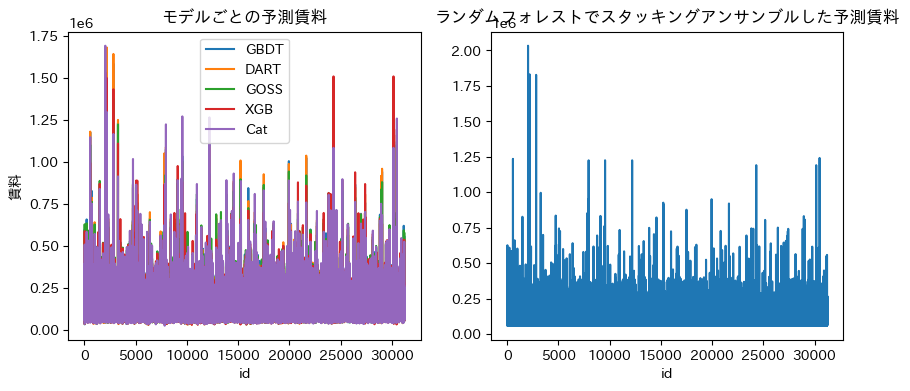

In [84]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(pred_GBDT, label='GBDT')
ax.plot(pred_DART, label='DART')
ax.plot(pred_GOSS, label='GOSS')
ax.plot(pred_XGB, label='XGB')
ax.plot(pred_CatBoost, label='Cat')
ax.set_xlabel("id")
ax.set_ylabel('賃料')
ax.set_title('モデルごとの予測賃料')

ax2.plot(blend_pred)
ax2.set_xlabel('id')
ax2.set_title('ランダムフォレストでスタッキングアンサンブルした予測賃料')

ax.legend(loc='best')
plt.show()

In [85]:
blend_pred.describe()

,0
count,3.126200e+04
mean,1.193907e+05
std,6.939923e+04
min,5.817141e+04
25%,8.464225e+04
50%,1.079477e+05
75%,1.401728e+05
max,2.033572e+06
